In [43]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [44]:
input_csv = "../results-yasmin/math.csv"
baseline = "x86_64,qemu,qemu"
base_arch, base_runtime, base_tag = baseline.split(',')
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag
0,x86_64,micro.math-baseline,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,33369.926372,0,qemu,risotto
1,x86_64,micro.math-plus,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,36610.831674,0,qemu,risotto
2,x86_64,micro.math-minus,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,36630.447481,0,qemu,risotto
3,x86_64,micro.math-mult,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,37857.215647,0,qemu,risotto
4,x86_64,micro.math-div,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,32984.498415,0,qemu,risotto
...,...,...,...,...,...,...,...,...,...,...
275,aarch64,micro.math-asin,/home/redha/benchmarks/math/math,none,1.0,ops/ms,29388.046383,0,native,native
276,aarch64,micro.math-acos,/home/redha/benchmarks/math/math,none,1.0,ops/ms,29452.433033,0,native,native
277,aarch64,micro.math-atan,/home/redha/benchmarks/math/math,none,1.0,ops/ms,29367.085725,0,native,native
278,aarch64,micro.math-exp,/home/redha/benchmarks/math/math,none,1.0,ops/ms,112748.117439,0,native,native


In [45]:
base_df = df.loc[df['tag'] == 'qemu']
base_df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag
140,x86_64,micro.math-baseline,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,31519.378209,0,qemu,qemu
141,x86_64,micro.math-plus,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,35877.982958,0,qemu,qemu
142,x86_64,micro.math-minus,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,37198.888284,0,qemu,qemu
143,x86_64,micro.math-mult,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,36018.102655,0,qemu,qemu
144,x86_64,micro.math-div,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,34366.584397,0,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
205,x86_64,micro.math-asin,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1249.379929,0,qemu,qemu
206,x86_64,micro.math-acos,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1247.106899,0,qemu,qemu
207,x86_64,micro.math-atan,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1247.671486,0,qemu,qemu
208,x86_64,micro.math-exp,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,4491.621244,0,qemu,qemu


In [46]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()
base_means

{'micro.math-cos': 372.40863,
 'micro.math-baseline': 31530.125,
 'micro.math-acos': 1250.1891,
 'micro.math-sin': 377.90656,
 'micro.math-log': 2567.6587,
 'micro.math-mult': 36911.117,
 'micro.math-minus': 36961.586,
 'micro.math-div': 33638.438,
 'micro.math-plus': 35028.81,
 'micro.math-sqrt': 27993.162,
 'micro.math-tan': 303.5914,
 'micro.math-asin': 1253.2644,
 'micro.math-atan': 1250.5065,
 'micro.math-exp': 4475.733}

In [47]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,qemu,risotto,native
0,micro.math-acos,1250.189015,10411.460257,29402.570490
1,micro.math-asin,1253.264346,10313.580358,29371.516379
2,micro.math-atan,1250.506467,10462.063373,29354.131651
3,micro.math-baseline,31530.125362,33328.068296,333475.328196
4,micro.math-cos,372.408643,3712.147596,4879.073139
5,micro.math-div,33638.437219,33665.406431,156789.481162
6,micro.math-exp,4475.732928,13852.847121,112911.718342
7,micro.math-log,2567.658672,13354.485515,52005.557542
8,micro.math-minus,36961.583762,37134.997325,282557.426237
9,micro.math-mult,36911.116055,37180.046654,282607.041029


In [48]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        dct['bench'] = dct['bench'][11:]
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,x86_64,baseline,none,1.0,ops/ms,33369.926372,qemu,risotto,1.058351,risotto,0.0
1,x86_64,plus,none,1.0,ops/ms,36610.831674,qemu,risotto,1.045163,risotto,0.0
2,x86_64,minus,none,1.0,ops/ms,36630.447481,qemu,risotto,0.991041,risotto,0.0
3,x86_64,mult,none,1.0,ops/ms,37857.215647,qemu,risotto,1.025632,risotto,0.0
4,x86_64,div,none,1.0,ops/ms,32984.498415,qemu,risotto,0.980560,risotto,0.0
...,...,...,...,...,...,...,...,...,...,...,...
205,aarch64,asin,none,1.0,ops/ms,29388.046383,native,native,23.449199,native,0.0
206,aarch64,acos,none,1.0,ops/ms,29452.433033,native,native,23.558383,native,0.0
207,aarch64,atan,none,1.0,ops/ms,29367.085725,native,native,23.484153,native,0.0
208,aarch64,exp,none,1.0,ops/ms,112748.117439,native,native,25.190984,native,0.0


In [49]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [50]:
max(df_norm['norm'].values)
df_norm.loc[df_norm['bench'] == 'log']['norm'].values.mean()

10.218716482185538

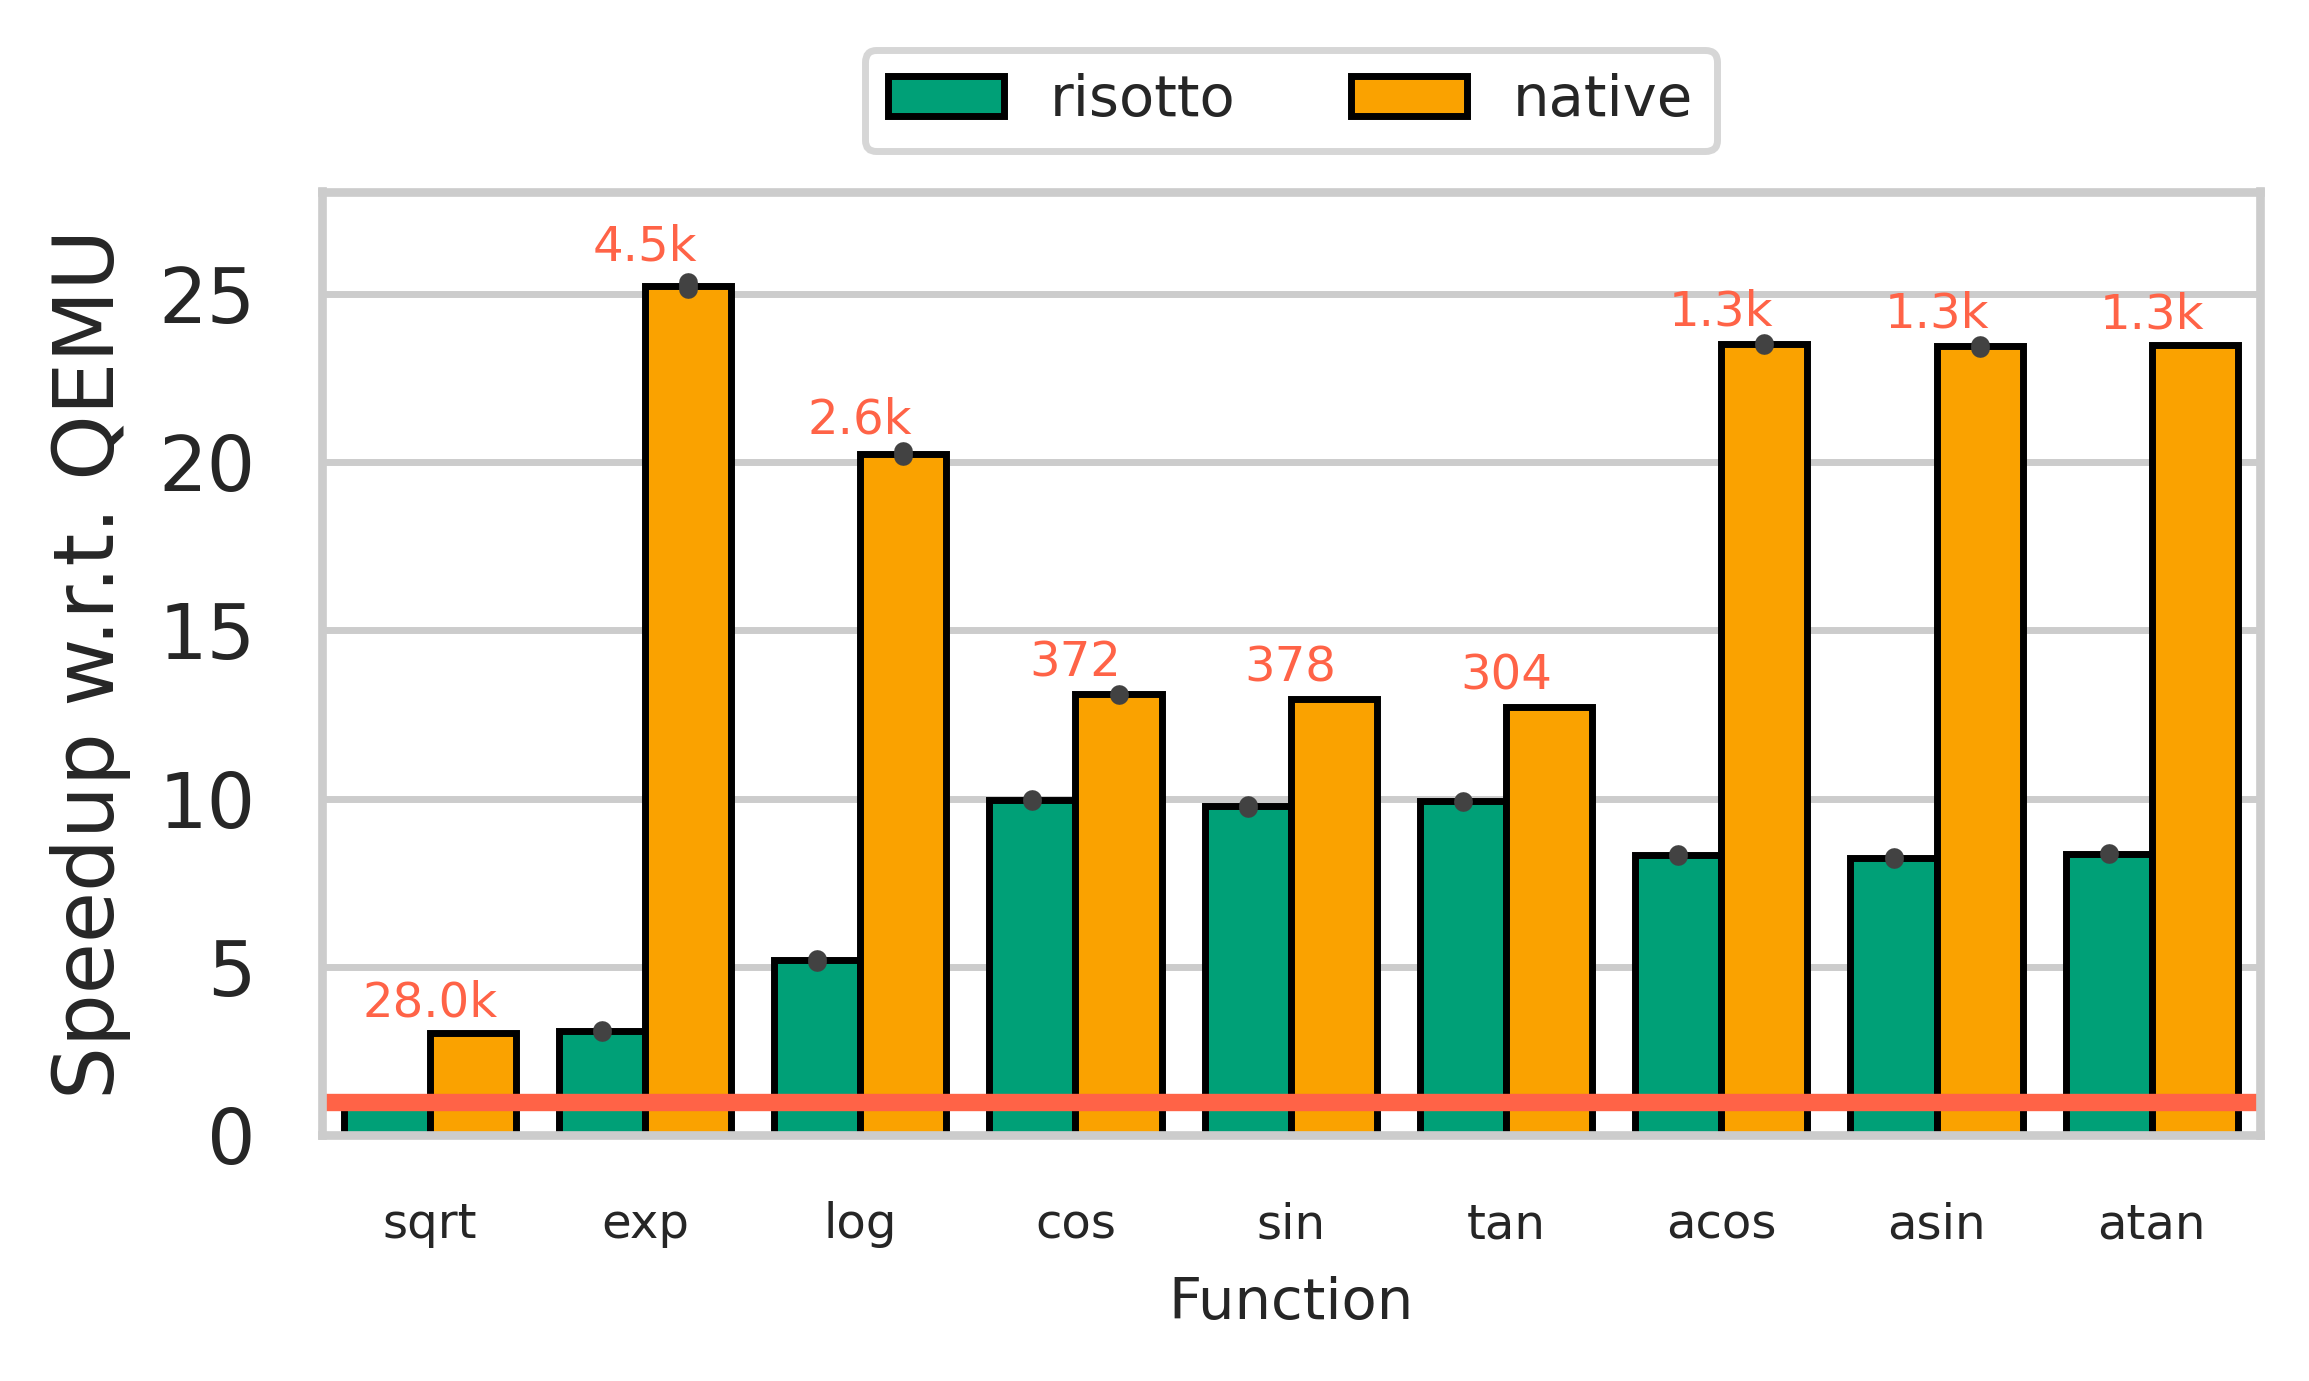

In [51]:
fig = plt.figure(figsize=(5,2.5), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
order = [ 'sqrt', 'exp', 'log', 'cos', 'sin', 'tan', 'acos', 'asin', 'atan' ]
ax = sbs.barplot(data=df_norm, x='bench', y='norm', hue='label',
                 hue_order=['risotto', 'native'], order=order)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=0, ha="center", fontsize='xx-small')
plt.xlabel("Function", fontsize='x-small')
plt.ylabel("Speedup w.r.t. QEMU")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.1)
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(order):
    bm = base_means[f"micro.math-{value}"]
    if bm > 1000000:
        v = f"{bm / 1000000:.0f}M"
    elif bm > 1000:
        v = f"{bm / 1000:.1f}k"
    else:
        v = f"{bm:.0f}"
    #tmp = max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]
    tmp = max(df_norm.loc[df_norm['bench'] == value]['norm'].values)
    plt.text(idx, tmp+.5, f"{v}", fontsize='xx-small', color='tomato', ha='center')
#plt.vlines(range(0, len(order)), ymin=0, ymax=max_val, linestyle='dashed', colors='grey', linewidth=.25, zorder=0)

# Set color + hatch
style = {
    'fill': [ True, True ],
    'color': [ palette['bluish green'], palette['orange'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / int(len(order)))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), borderaxespad=0, ncol=2, fontsize='x-small')

In [52]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [53]:
for i in sorted_nicely(base_means):
    print(f"{i:25}: {base_means[i]:>20.1f}")

micro.math-acos          :               1250.2
micro.math-asin          :               1253.3
micro.math-atan          :               1250.5
micro.math-baseline      :              31530.1
micro.math-cos           :                372.4
micro.math-div           :              33638.4
micro.math-exp           :               4475.7
micro.math-log           :               2567.7
micro.math-minus         :              36961.6
micro.math-mult          :              36911.1
micro.math-plus          :              35028.8
micro.math-sin           :                377.9
micro.math-sqrt          :              27993.2
micro.math-tan           :                303.6


In [54]:
print(f"bench{20*' '}    risotto     native")
for b in sorted_nicely(base_means):
    ris = df_norm.loc[(df_norm['bench'] == b[11:]) & (df_norm['tag'] == 'risotto')]
    nat = df_norm.loc[(df_norm['bench'] == b[11:]) & (df_norm['tag'] == 'native')]
    print(f"{b:25} {np.mean(ris['norm'].values):>10.4f} {np.mean(nat['norm'].values):>10.2f}")

bench                        risotto     native
micro.math-acos               8.3279      23.52
micro.math-asin               8.2294      23.44
micro.math-atan               8.3663      23.47
micro.math-baseline           1.0570      10.58
micro.math-cos                9.9679      13.10
micro.math-div                1.0008       4.66
micro.math-exp                3.0951      25.23
micro.math-log                5.2010      20.25
micro.math-minus              1.0047       7.64
micro.math-mult               1.0073       7.66
micro.math-plus               1.0361       7.96
micro.math-sin                9.7710      12.96
micro.math-sqrt               0.9516       3.04
micro.math-tan                9.9224      12.72
